# DATA COLLECTION

In [4]:
!pip install --upgrade pip

In [5]:
#!pip3 install twint
!pip install -U textblob
!pip install emoji --upgrade
!pip install --upgrade pip
!pip install wordcloud
!pip install nest_asyncio
!pip install twint


In [6]:
conda install git


Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [7]:
!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint
#!pip install --user --upgrade git+https://github.com/twintproject/twint.git@master#egg=twint
#!pip uninstall -y twint
#!pip install --user git+git://github.com/ajctrl/twint@patch-1
#!pip show twint --version
    
#fixes
    #!pip3 install --user --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint;
#pip3 install --user --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint;
#!pip3 uninstall twint
#!pip3 install git+git://github.com/ajctrl/twint@patch-1
    

  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to c:\users\amber\appdata\local\temp\pip-install-ab_mr5xs\twint_70a7f26d8bb2475b90018bfec0baa638


  Running command git clone -q https://github.com/twintproject/twint.git 'C:\Users\Amber\AppData\Local\Temp\pip-install-ab_mr5xs\twint_70a7f26d8bb2475b90018bfec0baa638'
  Running command git checkout -q origin/master


In [8]:
#may need to use API crdentials

In [9]:
conda install -c conda-forge/label/gcc7 missingno 

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Amber\anaconda3

  added / updated specs:
    - missingno


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2021.1.19-~ --> conda-forge/label/gcc7::ca-certificates-2018.10.15-ha4d7672_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip install plotly

#scientific and machine learning libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
#plotting options
import seaborn as sns
import re
import matplotlib.pyplot as plt
import missingno as ms
#% matplotlib inline
pd.set_option('display.max_colwidth',None)
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#twint
import twint
#to avoid problems with running twint
import nest_asyncio
nest_asyncio.apply()


In [2]:
!pip install spacy

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import spacy

# importing package to recognize stop words i.e. the, and, an etc
from spacy.lang.en.stop_words import STOP_WORDS
stop_words = spacy.lang.en.stop_words.STOP_WORDS

import datetime

import plotly.express as px

#nltk.download('punkt')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

stemmer = PorterStemmer()

In [3]:
## Sources: 

keywords = ["digital","museum","ontario","covid","OMA"]

search_concatenation = keywords


In [4]:
search_concatenation

['digital', 'museum', 'ontario', 'covid', 'OMA']

In [5]:
len(search_concatenation)

5

In [6]:
# the concept is to perform the scraping using the elements in the lists above: imm_basic, immigrant_mod, migrant_mod and refugee_mod
df = []
for s in search_concatenation:
    config = twint.Config()
    config.Search = s
    config.Lang = "en"
    config.Limit = 200
    config.Since = "2020-04-01 00:00:00"
    config.Until = "2020-04-09 00:00:00"
    config.Hide_output = True
    config.Pandas = True
    twint.run.Search(config)
    Tweets_df = twint.storage.panda.Tweets_df
    df.append(Tweets_df)  
#print(Tweets_df)   
    
# see pd.concat documentation for more info
df1 = pd.concat(df).sort_values(by=['date']).reset_index()
print(df1)

#print(len(df))

     index                   id      conversation_id    created_at  \
0      199  1247648656364384266  1247648056683757569  1.586298e+12   
1      198  1247648778754101248  1247549006110248961  1.586298e+12   
2      197  1247648868923310083  1247558263819952135  1.586298e+12   
3      196  1247649113430208520  1247649113430208520  1.586298e+12   
4      195  1247649244602826759  1247584505474449409  1.586298e+12   
..     ...                  ...                  ...           ...   
995      8  1247675520633819137  1247675520633819137  1.586304e+12   
996      9  1247675520122322946  1247675520122322946  1.586304e+12   
997     10  1247675519396651010  1247614457808703488  1.586304e+12   
998      0  1247675522462576641  1247675522462576641  1.586304e+12   
999      0  1247675519337889792  1247675519337889792  1.586304e+12   

                    date timezone  \
0    2020-04-07 18:13:14    -0400   
1    2020-04-07 18:13:43    -0400   
2    2020-04-07 18:14:05    -0400   
3    2020-0

In [7]:
#outputs number of rows and columns 
df1.shape

(1000, 39)

In [8]:
# with this command I'm checking 
df1.groupby('search').sum().shape, len(search_concatenation)


((5, 9), 5)

In [9]:
#Save Uncleaned Data
df1.to_csv('uncleaned_data.csv')

In [10]:
df=pd.read_csv('uncleaned_data.csv')

In [11]:

#am here today -jan26
##Merge all the data scraped from every week

Week1_Tweets = pd.read_csv("uncleaned_data.csv")
#Week2_Tweets = pd.read_csv("tweets2.csv")

In [12]:
df=Week1_Tweets
df.head(30)

,Unnamed: 0,index,id,conversation_id,created_at,date,timezone,place,tweet,language,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,199,1247648656364384266,1247648056683757569,1.586298e+12,2020-04-07 18:13:14,-400,NaN,@_Albaseet28 @Valhalla_X0 @baddoleesa @Oma_GuGu @ks1malaika @DONJAZZY @Abass_obesere @teejanson Okay now,en,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': '_Albaseet28', 'name': 'DADDY BRIGHT', 'id': '3090986177'}, {'screen_name': 'Valhalla_X0', 'name': 'Valhalla', 'id': '607137671'}, {'screen_name': 'baddoleesa', 'name': 'Baddoleesa', 'id': '153018287'}, {'screen_name': 'Oma_GuGu', 'name': 'Oma💙💙💙', 'id': '1148963767406989313'}, {'screen_name': 'ks1malaika', 'name': 'Sulaimon Adekunle', 'id': '777997209736544256'}, {'screen_name': 'DONJAZZY', 'name': 'IT’S DON JAZZY AGAIN', 'id': '53817066'}, {'screen_name': 'Abass_Obesere', 'name': 'Alh. Abass Akande Obesere', 'id': '1129681986740731904'}, {'screen_name': 'teejanson', 'name': '🇳🇬Teejay Communication Hub🇳🇬', 'id': '228974370'}]",NaN,NaN,NaN,NaN
1,1,198,1247648778754101248,1247549006110248961,1.586298e+12,2020-04-07 18:13:43,-400,NaN,@GOtvNg Please I need a reconnection of my gotv account. I made payment 2000 for gotvmax instead of gotvplus and my account is yet to be activated. My IUC NUMBER 4601688151 Account details used OKORO DORIS N. #2000Please kindly attend to my request thank you,en,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'GOtvNg', 'name': 'GOtv Nigeria', 'id': '493064007'}]",NaN,NaN,NaN,NaN
2,2,197,1247648868923310083,1247558263819952135,1.586298e+12,2020-04-07 18:14:05,-400,NaN,@samiltayyar27 Devletimizden allah razı olsun annem ablam hepside hatta kapıya kadar geldi bilip bilmeden konuşmayın devletinize düşmanlık yapmayın keşke herkese verilse oma olmuyor keşke olsa bende 3 haftadır isyerim kapalı 3 çocuğum var kötü günler için birikim yapmıştık halimize şükür,tr,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'samiltayyar27', 'name': 'Şamil Tayyar', 'id': '462921513'}]",NaN,NaN,NaN,NaN
3,3,196,1247649113430208520,1247649113430208520,1.586298e+12,2020-04-07 18:15:03,-400,NaN,Has #COVID19 caused gaps in your students &amp; residents curriculum? OMA has created education and a curriculum for a FREE four-week obesity medicine “supplemental education” that can be completed remotely/online. https://t.co/du523keBIv,en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,4,195,1247649244602826759,1247584505474449409,1.586298e+12,2020-04-07 18:15:34,-400,NaN,"@MrsMarryPoppins Wenn du 18 bist kannst du machen was du willst... ... früher von mir gehasst, heute verwendet von mir selbst... Dabei wollte ich nie werden wie Oma und Opa. Gleichzeitig realisiere ich, das Oma und Opa mit recht nur mein bestes wollten.",de,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MrsMarryPoppins', 'name': 'Mrs_Mary', 'id': '2693038383'}]",NaN,NaN,NaN,NaN
5,5,194,1247649255000616966,1247592526288228355,1.586298e+12,2020-04-07 18:15:37,-400,NaN,@Oma_GuGu Great is thy faithfulness,en,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Oma_GuGu', 'name': 'Oma💙💙💙', 'id': '1148963767406989313'}]",NaN,NaN,NaN,NaN
6,6,193,1247649277565898755,1247648417536507919,1.586298e+12,2020-04-07 18:15:42,-400,NaN,"@Sonjoe_Kutuh Mad oooo DAT year was wen I was preparing to enter sec skul....by den , I was so innocent😂😂😂😂😂😂",en,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Sonjoe_Kutuh', 'name': 'MONITORING_SPIRIT', 'id': '991460466407944192'}]",NaN,NaN,NaN,NaN
7,7,192,1247649323908771846,1247578712851308544,1.586298e+12,2020-04-07 18:15:53,-400,NaN,@Ulu_oma @lazywritaNG Seconded,en,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'lazywritaNG', 'name': 'Anda Damisa', 'id': '900362936874549248'}]",NaN,NaN,NaN,NaN
8,8,191,1247649763803254784,1247092731840802816,1.586298e+12,2020-04-07 18:17:38,-400,NaN,@chimyxploit @AfamDeluxo Ekwulobia nwanyi oma,fi,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'chimyxploit', 'name': 'Chiamaka Nduka', 'id': '428087493'}, {'screen_name': 'AfamDeluxo', 'name': '

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1000 non-null   int64  
 1   index            1000 non-null   int64  
 2   id               1000 non-null   int64  
 3   conversation_id  1000 non-null   int64  
 4   created_at       1000 non-null   float64
 5   date             1000 non-null   object 
 6   timezone         1000 non-null   int64  
 7   place            15 non-null     object 
 8   tweet            1000 non-null   object 
 9   language         1000 non-null   object 
 10  hashtags         1000 non-null   object 
 11  cashtags         1000 non-null   object 
 12  user_id          1000 non-null   int64  
 13  user_id_str      1000 non-null   int64  
 14  username         1000 non-null   object 
 15  name             1000 non-null   object 
 16  day              1000 non-null   int64  
 17  hour           

In [14]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1000 non-null   int64  
 1   index            1000 non-null   int64  
 2   id               1000 non-null   int64  
 3   conversation_id  1000 non-null   int64  
 4   created_at       1000 non-null   float64
 5   date             1000 non-null   object 
 6   timezone         1000 non-null   int64  
 7   place            15 non-null     object 
 8   tweet            1000 non-null   object 
 9   language         1000 non-null   object 
 10  hashtags         1000 non-null   object 
 11  cashtags         1000 non-null   object 
 12  user_id          1000 non-null   int64  
 13  user_id_str      1000 non-null   int64  
 14  username         1000 non-null   object 
 15  name             1000 non-null   object 
 16  day              1000 non-null   int64  
 17  hour           

In [15]:
df.tail()

,Unnamed: 0,index,id,conversation_id,created_at,date,timezone,place,tweet,language,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
995,995,8,1247675520633819137,1247675520633819137,1.586304e+12,2020-04-07 19:59:59,-400,NaN,La OIT alerta que el mundo vive “la peor crisis desde la Segunda Guerra Mundial” por el COVID-19 https://t.co/XuRuTRbk3A,es,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
996,996,9,1247675520122322946,1247675520122322946,1.586304e+12,2020-04-07 19:59:59,-400,NaN,Join @karenmccrimmon and I on Thursday April 9th at 12 p.m. on Facebook Live as we discuss COVID-19 from both federal and municipal levels of government. Happy to answer any questions you may have. Tune in here: https://t.co/y1cgpFCUZK https://t.co/SSxh4VIjmL,en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
997,997,10,1247675519396651010,1247614457808703488,1.586304e+12,2020-04-07 19:59:59,-400,NaN,@MiguelRiosPur $25 es más barato que pasar horas/días tratando de conseguir una prueba de COVID o una admisión en un hospital de NY. ¡ni hablar de conseguir un ventilador! tremenda ganga de turismo médico.,es,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MiguelRiosPUR', 'name': 'Miguel Rios', 'id': '2983244612'}]",NaN,NaN,NaN,NaN
998,998,0,1247675522462576641,1247675522462576641,1.586304e+12,2020-04-07 19:59:59,-400,NaN,Coronavirus (COVID-19) at a glance https://t.co/A5VQLE11H6,en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
999,999,0,1247675519337889792,1247675519337889792,1.586304e+12,2020-04-07 19:59:59,-400,"{'type': 'Point', 'coordinates': [50.08063, 8.6780768]}",Projektmanager Digital (m/w/d) in #Frankfurt (Fest) #Designerdock #dasauge #jobs → https://t.co/5tcS1T3wQF,de,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [16]:
df.columns

Index(['Unnamed: 0', 'index', 'id', 'conversation_id', 'created_at', 'date',
       'timezone', 'place', 'tweet', 'language', 'hashtags', 'cashtags',
       'user_id', 'user_id_str', 'username', 'name', 'day', 'hour', 'link',
       'urls', 'photos', 'video', 'thumbnail', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [17]:
df1=df.drop(['Unnamed: 0','index','conversation_id',
       'timezone', 'place','user_id_str', 'username', 'name', 'day', 'hour', 'link',
            'photos', 'video', 'thumbnail','nlikes', 'nreplies',
       'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest'],axis=1)

In [18]:
df1.head()

,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet
0,1247648656364384266,1.586298e+12,2020-04-07 18:13:14,@_Albaseet28 @Valhalla_X0 @baddoleesa @Oma_GuGu @ks1malaika @DONJAZZY @Abass_obesere @teejanson Okay now,en,[],[],148369244,[],False
1,1247648778754101248,1.586298e+12,2020-04-07 18:13:43,@GOtvNg Please I need a reconnection of my gotv account. I made payment 2000 for gotvmax instead of gotvplus and my account is yet to be activated. My IUC NUMBER 4601688151 Account details used OKORO DORIS N. #2000Please kindly attend to my request thank you,en,['2000please'],[],1198687087442178048,[],False
2,1247648868923310083,1.586298e+12,2020-04-07 18:14:05,@samiltayyar27 Devletimizden allah razı olsun annem ablam hepside hatta kapıya kadar geldi bilip bilmeden konuşmayın devletinize düşmanlık yapmayın keşke herkese verilse oma olmuyor keşke olsa bende 3 haftadır isyerim kapalı 3 çocuğum var kötü günler için birikim yapmıştık halimize şükür,tr,[],[],2875638485,[],False
3,1247649113430208520,1.586298e+12,2020-04-07 18:15:03,Has #COVID19 caused gaps in your students &amp; residents curriculum? OMA has created education and a curriculum for a FREE four-week obesity medicine “supplemental education” that can be completed remotely/online. https://t.co/du523keBIv,en,['covid19'],[],58538300,['https://obesitymedicine.org/student-education/'],False
4,1247649244602826759,1.586298e+12,2020-04-07 18:15:34,"@MrsMarryPoppins Wenn du 18 bist kannst du machen was du willst... ... früher von mir gehasst, heute verwendet von mir selbst... Dabei wollte ich nie werden wie Oma und Opa. Gleichzeitig realisiere ich, das Oma und Opa mit recht nur mein bestes wollten.",de,[],[],1129147551230439425,[],False


In [19]:
df1.columns

Index(['id', 'created_at', 'date', 'tweet', 'language', 'hashtags', 'cashtags',
       'user_id', 'urls', 'retweet'],
      dtype='object')

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          1000 non-null   int64  
 1   created_at  1000 non-null   float64
 2   date        1000 non-null   object 
 3   tweet       1000 non-null   object 
 4   language    1000 non-null   object 
 5   hashtags    1000 non-null   object 
 6   cashtags    1000 non-null   object 
 7   user_id     1000 non-null   int64  
 8   urls        1000 non-null   object 
 9   retweet     1000 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 79.1+ KB


In [21]:
df1['tweet'].nunique()
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          1000 non-null   int64  
 1   created_at  1000 non-null   float64
 2   date        1000 non-null   object 
 3   tweet       1000 non-null   object 
 4   language    1000 non-null   object 
 5   hashtags    1000 non-null   object 
 6   cashtags    1000 non-null   object 
 7   user_id     1000 non-null   int64  
 8   urls        1000 non-null   object 
 9   retweet     1000 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 79.1+ KB


In [22]:
# load library
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# download the set of stop words the first time
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amber\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
# Load stop words
stop_words = stopwords.words('english')

# Show stop words
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [24]:
import re 
from textblob import TextBlob 
import emoji  


import re 
from textblob import TextBlob 
import emoji  
def clean_tweet(tweet): 
    tweet = re.sub(r'@[A-Za-z0-9]+', '', str(tweet)) # remove @mentions
    tweet = re.sub(r'#', '',  str(tweet)) # remove the '#' symbol
    tweet = re.sub(r'RT[\s]+', '',  str(tweet)) # remove RT
    tweet = re.sub(r'https?\/\/S+', '',  str(tweet)) # remove the hyperlink
    tweet = re.sub(r'http\S+', '',  str(tweet)) # remove the hyperlink
    tweet = re.sub(r'www\S+', '',  str(tweet)) # remove the www
    tweet = re.sub(r'twitter+', '',  str(tweet)) # remove the twiiter
    tweet = re.sub(r'pic+', '',  str(tweet)) # remove the pic
    tweet = re.sub(r'com', '',  str(tweet)) # remove the pic
    tweet = re.sub(r'africa', '',  str(tweet)) # remove the pic
    tweet = re.sub(r'innovation', '',  str(tweet)) # remove the pic
    tweet = re.sub(r'covid-19', '',  str(tweet)) # remove the pic
    tweet = re.sub(r'coronavirus', '',  str(tweet)) # remove the pic
    tweet = re.sub(r'technology', '',  str(tweet)) # remove the pic

    return tweet


def remove_emoji(tweet):
    return emoji.get_emoji_regexp().sub(u'', tweet)



In [25]:
df1['cleaned_text']=df1['tweet'].apply(clean_tweet)

In [26]:
df1['cleaned_text']=df1['cleaned_text'].apply(remove_emoji)

In [27]:
# Remove stop words
df1['cleaned_text'] = df1['cleaned_text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))

In [28]:
df1.head(20)

,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet,cleaned_text
0,1247648656364384266,1.586298e+12,2020-04-07 18:13:14,@_Albaseet28 @Valhalla_X0 @baddoleesa @Oma_GuGu @ks1malaika @DONJAZZY @Abass_obesere @teejanson Okay now,en,[],[],148369244,[],False,@_albaseet28 _x0 _gugu _obesere okay
1,1247648778754101248,1.586298e+12,2020-04-07 18:13:43,@GOtvNg Please I need a reconnection of my gotv account. I made payment 2000 for gotvmax instead of gotvplus and my account is yet to be activated. My IUC NUMBER 4601688151 Account details used OKORO DORIS N. #2000Please kindly attend to my request thank you,en,['2000please'],[],1198687087442178048,[],False,please i need reconnection gotv account. i made payment 2000 gotvmax instead gotvplus account yet activated. my iuc number 4601688151 account details used okoro doris n. 2000please kindly attend request thank
2,1247648868923310083,1.586298e+12,2020-04-07 18:14:05,@samiltayyar27 Devletimizden allah razı olsun annem ablam hepside hatta kapıya kadar geldi bilip bilmeden konuşmayın devletinize düşmanlık yapmayın keşke herkese verilse oma olmuyor keşke olsa bende 3 haftadır isyerim kapalı 3 çocuğum var kötü günler için birikim yapmıştık halimize şükür,tr,[],[],2875638485,[],False,devletimizden allah razı olsun annem ablam hepside hatta kapıya kadar geldi bilip bilmeden konuşmayın devletinize düşmanlık yapmayın keşke herkese verilse oma olmuyor keşke olsa bende 3 haftadır isyerim kapalı 3 çocuğum var kötü günler için birikim yapmıştık halimize şükür
3,1247649113430208520,1.586298e+12,2020-04-07 18:15:03,Has #COVID19 caused gaps in your students &amp; residents curriculum? OMA has created education and a curriculum for a FREE four-week obesity medicine “supplemental education” that can be completed remotely/online. https://t.co/du523keBIv,en,['covid19'],[],58538300,['https://obesitymedicine.org/student-education/'],False,has covid19 caused gaps students &amp; residents curriculum? oma created education curriculum free four-week obesity medicine “supplemental education” pleted remotely/online.
4,1247649244602826759,1.586298e+12,2020-04-07 18:15:34,"@MrsMarryPoppins Wenn du 18 bist kannst du machen was du willst... ... früher von mir gehasst, heute verwendet von mir selbst... Dabei wollte ich nie werden wie Oma und Opa. Gleichzeitig realisiere ich, das Oma und Opa mit recht nur mein bestes wollten.",de,[],[],1129147551230439425,[],False,"wenn du 18 bist kannst du machen du willst... ... früher von mir gehasst, heute verwendet von mir selbst... dabei wollte ich nie werden wie oma und opa. gleichzeitig realisiere ich, das oma und opa mit recht nur mein bestes wollten."
5,1247649255000616966,1.586298e+12,2020-04-07 18:15:37,@Oma_GuGu Great is thy faithfulness,en,[],[],996731688062513152,[],False,_gugu great thy faithfulness
6,1247649277565898755,1.586298e+12,2020-04-07 18:15:42,"@Sonjoe_Kutuh Mad oooo DAT year was wen I was preparing to enter sec skul....by den , I was so innocent😂😂😂😂😂😂",en,[],[],1243675378868199426,[],False,"_kutuh mad oooo dat year wen i preparing enter sec skul....by den , i innocent"
7,1247649323908771846,1.586298e+12,2020-04-07 18:15:53,@Ulu_oma @lazywritaNG Seconded,en,[],[],1176038133189750784,[],False,_oma seconded
8,1247649763803254784,1.586298e+12,2020-04-07 18:17:38,@chimyxploit @AfamDeluxo Ekwulobia nwanyi oma,fi,[],[],3907173200,[],False,ekwulobia nwanyi oma
9,1247649815393157120,1.586298e+12,2020-04-07 18:17:50,kui homme on sama ilus ilm kui täna ma astun oma koopast välja,et,[],[],737951587566522368,[],False,kui homme sama ilus ilm kui täna astun oma koopast välja


In [29]:
df1.to_csv("CLEANED_DATA_afterhygiene_feb23.csv")

In [30]:
#Data Analysis¶

In [31]:
#running below code to extract necessary routines to run wordcloud
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [32]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [33]:
df1=pd.read_csv('CLEANED_DATA_afterhygiene_feb23.csv')
df1.head()

,Unnamed: 0,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet,cleaned_text
0,0,1247648656364384266,1.586298e+12,2020-04-07 18:13:14,@_Albaseet28 @Valhalla_X0 @baddoleesa @Oma_GuGu @ks1malaika @DONJAZZY @Abass_obesere @teejanson Okay now,en,[],[],148369244,[],False,@_albaseet28 _x0 _gugu _obesere okay
1,1,1247648778754101248,1.586298e+12,2020-04-07 18:13:43,@GOtvNg Please I need a reconnection of my gotv account. I made payment 2000 for gotvmax instead of gotvplus and my account is yet to be activated. My IUC NUMBER 4601688151 Account details used OKORO DORIS N. #2000Please kindly attend to my request thank you,en,['2000please'],[],1198687087442178048,[],False,please i need reconnection gotv account. i made payment 2000 gotvmax instead gotvplus account yet activated. my iuc number 4601688151 account details used okoro doris n. 2000please kindly attend request thank
2,2,1247648868923310083,1.586298e+12,2020-04-07 18:14:05,@samiltayyar27 Devletimizden allah razı olsun annem ablam hepside hatta kapıya kadar geldi bilip bilmeden konuşmayın devletinize düşmanlık yapmayın keşke herkese verilse oma olmuyor keşke olsa bende 3 haftadır isyerim kapalı 3 çocuğum var kötü günler için birikim yapmıştık halimize şükür,tr,[],[],2875638485,[],False,devletimizden allah razı olsun annem ablam hepside hatta kapıya kadar geldi bilip bilmeden konuşmayın devletinize düşmanlık yapmayın keşke herkese verilse oma olmuyor keşke olsa bende 3 haftadır isyerim kapalı 3 çocuğum var kötü günler için birikim yapmıştık halimize şükür
3,3,1247649113430208520,1.586298e+12,2020-04-07 18:15:03,Has #COVID19 caused gaps in your students &amp; residents curriculum? OMA has created education and a curriculum for a FREE four-week obesity medicine “supplemental education” that can be completed remotely/online. https://t.co/du523keBIv,en,['covid19'],[],58538300,['https://obesitymedicine.org/student-education/'],False,has covid19 caused gaps students &amp; residents curriculum? oma created education curriculum free four-week obesity medicine “supplemental education” pleted remotely/online.
4,4,1247649244602826759,1.586298e+12,2020-04-07 18:15:34,"@MrsMarryPoppins Wenn du 18 bist kannst du machen was du willst... ... früher von mir gehasst, heute verwendet von mir selbst... Dabei wollte ich nie werden wie Oma und Opa. Gleichzeitig realisiere ich, das Oma und Opa mit recht nur mein bestes wollten.",de,[],[],1129147551230439425,[],False,"wenn du 18 bist kannst du machen du willst... ... früher von mir gehasst, heute verwendet von mir selbst... dabei wollte ich nie werden wie oma und opa. gleichzeitig realisiere ich, das oma und opa mit recht nur mein bestes wollten."


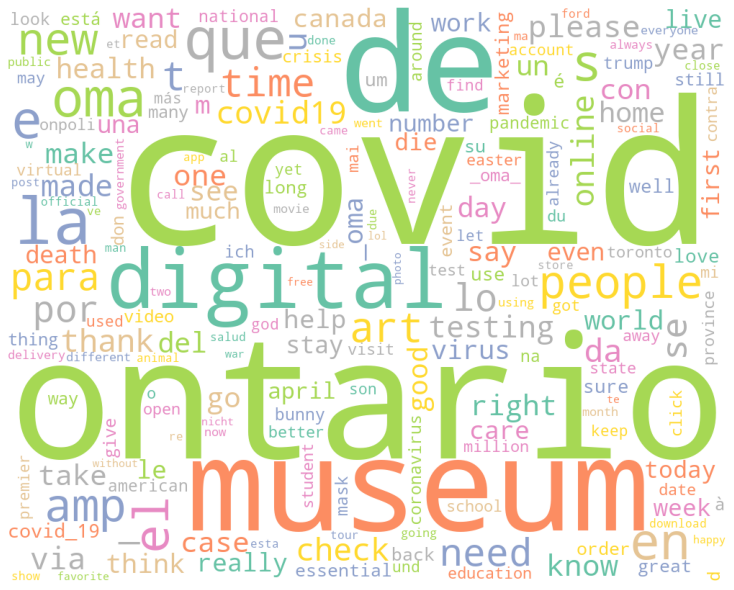

In [34]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df1.cleaned_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color='white', colormap='Set2', 
                collocations=False, 
                stopwords = stopwords, 
                min_font_size = 12).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [35]:
# get functionality of subjectivity and polarity 
def getSubjectivity(text):
    return TextBlob( str(text)).sentiment.subjectivity

def getPolarity(text):
    return TextBlob( str(text)).sentiment.polarity

In [36]:
df1.dropna(subset=['cleaned_text'], inplace = True)
df1.reset_index(drop=True, inplace=True)

In [37]:
df1['Subjectivity'] = df1['cleaned_text'].apply(getSubjectivity)
df1['Polarity'] = df1['cleaned_text'].apply(getPolarity)
df1.head()

,Unnamed: 0,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet,cleaned_text,Subjectivity,Polarity
0,0,1247648656364384266,1.586298e+12,2020-04-07 18:13:14,@_Albaseet28 @Valhalla_X0 @baddoleesa @Oma_GuGu @ks1malaika @DONJAZZY @Abass_obesere @teejanson Okay now,en,[],[],148369244,[],False,@_albaseet28 _x0 _gugu _obesere okay,0.5,0.5
1,1,1247648778754101248,1.586298e+12,2020-04-07 18:13:43,@GOtvNg Please I need a reconnection of my gotv account. I made payment 2000 for gotvmax instead of gotvplus and my account is yet to be activated. My IUC NUMBER 4601688151 Account details used OKORO DORIS N. #2000Please kindly attend to my request thank you,en,['2000please'],[],1198687087442178048,[],False,please i need reconnection gotv account. i made payment 2000 gotvmax instead gotvplus account yet activated. my iuc number 4601688151 account details used okoro doris n. 2000please kindly attend request thank,0.9,0.6
2,2,1247648868923310083,1.586298e+12,2020-04-07 18:14:05,@samiltayyar27 Devletimizden allah razı olsun annem ablam hepside hatta kapıya kadar geldi bilip bilmeden konuşmayın devletinize düşmanlık yapmayın keşke herkese verilse oma olmuyor keşke olsa bende 3 haftadır isyerim kapalı 3 çocuğum var kötü günler için birikim yapmıştık halimize şükür,tr,[],[],2875638485,[],False,devletimizden allah razı olsun annem ablam hepside hatta kapıya kadar geldi bilip bilmeden konuşmayın devletinize düşmanlık yapmayın keşke herkese verilse oma olmuyor keşke olsa bende 3 haftadır isyerim kapalı 3 çocuğum var kötü günler için birikim yapmıştık halimize şükür,0.0,0.0
3,3,1247649113430208520,1.586298e+12,2020-04-07 18:15:03,Has #COVID19 caused gaps in your students &amp; residents curriculum? OMA has created education and a curriculum for a FREE four-week obesity medicine “supplemental education” that can be completed remotely/online. https://t.co/du523keBIv,en,['covid19'],[],58538300,['https://obesitymedicine.org/student-education/'],False,has covid19 caused gaps students &amp; residents curriculum? oma created education curriculum free four-week obesity medicine “supplemental education” pleted remotely/online.,0.8,0.4
4,4,1247649244602826759,1.586298e+12,2020-04-07 18:15:34,"@MrsMarryPoppins Wenn du 18 bist kannst du machen was du willst... ... früher von mir gehasst, heute verwendet von mir selbst... Dabei wollte ich nie werden wie Oma und Opa. Gleichzeitig realisiere ich, das Oma und Opa mit recht nur mein bestes wollten.",de,[],[],1129147551230439425,[],False,"wenn du 18 bist kannst du machen du willst... ... früher von mir gehasst, heute verwendet von mir selbst... dabei wollte ich nie werden wie oma und opa. gleichzeitig realisiere ich, das oma und opa mit recht nur mein bestes wollten.",0.0,0.0


In [38]:
def get_Polarity_Analysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
def get_Subjectivity_Analysis(score):
    if score >  0:
      return 'Opinion'
    else:
      return 'Fact'

df1['Analysis_Polarity'] = df1['Polarity'].apply(get_Polarity_Analysis)

df1['Analysis_Subjectivity'] = df1['Subjectivity'].apply(get_Subjectivity_Analysis)

# Show the dataframe
df1.head(20)



,Unnamed: 0,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,0,1247648656364384266,1.586298e+12,2020-04-07 18:13:14,@_Albaseet28 @Valhalla_X0 @baddoleesa @Oma_GuGu @ks1malaika @DONJAZZY @Abass_obesere @teejanson Okay now,en,[],[],148369244,[],False,@_albaseet28 _x0 _gugu _obesere okay,0.500000,0.500000,Positive,Opinion
1,1,1247648778754101248,1.586298e+12,2020-04-07 18:13:43,@GOtvNg Please I need a reconnection of my gotv account. I made payment 2000 for gotvmax instead of gotvplus and my account is yet to be activated. My IUC NUMBER 4601688151 Account details used OKORO DORIS N. #2000Please kindly attend to my request thank you,en,['2000please'],[],1198687087442178048,[],False,please i need reconnection gotv account. i made payment 2000 gotvmax instead gotvplus account yet activated. my iuc number 4601688151 account details used okoro doris n. 2000please kindly attend request thank,0.900000,0.600000,Positive,Opinion
2,2,1247648868923310083,1.586298e+12,2020-04-07 18:14:05,@samiltayyar27 Devletimizden allah razı olsun annem ablam hepside hatta kapıya kadar geldi bilip bilmeden konuşmayın devletinize düşmanlık yapmayın keşke herkese verilse oma olmuyor keşke olsa bende 3 haftadır isyerim kapalı 3 çocuğum var kötü günler için birikim yapmıştık halimize şükür,tr,[],[],2875638485,[],False,devletimizden allah razı olsun annem ablam hepside hatta kapıya kadar geldi bilip bilmeden konuşmayın devletinize düşmanlık yapmayın keşke herkese verilse oma olmuyor keşke olsa bende 3 haftadır isyerim kapalı 3 çocuğum var kötü günler için birikim yapmıştık halimize şükür,0.000000,0.000000,Neutral,Fact
3,3,1247649113430208520,1.586298e+12,2020-04-07 18:15:03,Has #COVID19 caused gaps in your students &amp; residents curriculum? OMA has created education and a curriculum for a FREE four-week obesity medicine “supplemental education” that can be completed remotely/online. https://t.co/du523keBIv,en,['covid19'],[],58538300,['https://obesitymedicine.org/student-education/'],False,has covid19 caused gaps students &amp; residents curriculum? oma created education curriculum free four-week obesity medicine “supplemental education” pleted remotely/online.,0.800000,0.400000,Positive,Opinion
4,4,1247649244602826759,1.586298e+12,2020-04-07 18:15:34,"@MrsMarryPoppins Wenn du 18 bist kannst du machen was du willst... ... früher von mir gehasst, heute verwendet von mir selbst... Dabei wollte ich nie werden wie Oma und Opa. Gleichzeitig realisiere ich, das Oma und Opa mit recht nur mein bestes wollten.",de,[],[],1129147551230439425,[],False,"wenn du 18 bist kannst du machen du willst... ... früher von mir gehasst, heute verwendet von mir selbst... dabei wollte ich nie werden wie oma und opa. gleichzeitig realisiere ich, das oma und opa mit recht nur mein bestes wollten.",0.000000,0.000000,Neutral,Fact
5,5,1247649255000616966,1.586298e+12,2020-04-07 18:15:37,@Oma_GuGu Great is thy faithfulness,en,[],[],996731688062513152,[],False,_gugu great thy faithfulness,0.750000,0.800000,Positive,Opinion
6,6,1247649277565898755,1.586298e+12,2020-04-07 18:15:42,"@Sonjoe_Kutuh Mad oooo DAT year was wen I was preparing to enter sec skul....by den , I was so innocent😂😂😂😂😂😂",en,[],[],1243675378868199426,[],False,"_kutuh mad oooo dat year wen i preparing enter sec skul....by den , i innocent",0.766667,-0.075000,Negative,Opinion
7,7,1247649323908771846,1.586298e+12,2020-04-07 18:15:53,@Ulu_oma @lazywritaNG Seconded,en,[],[],1176038133189750784,[],False,_oma seconded,0.000000,0.000000,Neutral,Fact
8,8,1247649763803254784,1.586298e+12,2020-04-07 18:17:38,@chimyxploit @AfamDeluxo Ekwulobia nwanyi oma,fi,[],[],3907173200,[],False,ekwulobia nwanyi oma,0.000000,0.000000,Neutral,Fact
9,9,1247649815393157120,1.586298e+12,2020-04-07 18:17:50,kui homme on sama ilus ilm kui täna ma astun oma koopast välja,et,[],[],737951587566522368,[],False,kui homme sama ilus ilm kui täna astun oma koopast 

In [39]:
df1.to_csv("PolaritySubjectivityInnovation_mar16.csv")

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             994 non-null    int64  
 1   id                     994 non-null    int64  
 2   created_at             994 non-null    float64
 3   date                   994 non-null    object 
 4   tweet                  994 non-null    object 
 5   language               994 non-null    object 
 6   hashtags               994 non-null    object 
 7   cashtags               994 non-null    object 
 8   user_id                994 non-null    int64  
 9   urls                   994 non-null    object 
 10  retweet                994 non-null    bool   
 11  cleaned_text           994 non-null    object 
 12  Subjectivity           994 non-null    float64
 13  Polarity               994 non-null    float64
 14  Analysis_Polarity      994 non-null    object 
 15  Analys

In [41]:
df1.head()

,Unnamed: 0,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,0,1247648656364384266,1.586298e+12,2020-04-07 18:13:14,@_Albaseet28 @Valhalla_X0 @baddoleesa @Oma_GuGu @ks1malaika @DONJAZZY @Abass_obesere @teejanson Okay now,en,[],[],148369244,[],False,@_albaseet28 _x0 _gugu _obesere okay,0.5,0.5,Positive,Opinion
1,1,1247648778754101248,1.586298e+12,2020-04-07 18:13:43,@GOtvNg Please I need a reconnection of my gotv account. I made payment 2000 for gotvmax instead of gotvplus and my account is yet to be activated. My IUC NUMBER 4601688151 Account details used OKORO DORIS N. #2000Please kindly attend to my request thank you,en,['2000please'],[],1198687087442178048,[],False,please i need reconnection gotv account. i made payment 2000 gotvmax instead gotvplus account yet activated. my iuc number 4601688151 account details used okoro doris n. 2000please kindly attend request thank,0.9,0.6,Positive,Opinion
2,2,1247648868923310083,1.586298e+12,2020-04-07 18:14:05,@samiltayyar27 Devletimizden allah razı olsun annem ablam hepside hatta kapıya kadar geldi bilip bilmeden konuşmayın devletinize düşmanlık yapmayın keşke herkese verilse oma olmuyor keşke olsa bende 3 haftadır isyerim kapalı 3 çocuğum var kötü günler için birikim yapmıştık halimize şükür,tr,[],[],2875638485,[],False,devletimizden allah razı olsun annem ablam hepside hatta kapıya kadar geldi bilip bilmeden konuşmayın devletinize düşmanlık yapmayın keşke herkese verilse oma olmuyor keşke olsa bende 3 haftadır isyerim kapalı 3 çocuğum var kötü günler için birikim yapmıştık halimize şükür,0.0,0.0,Neutral,Fact
3,3,1247649113430208520,1.586298e+12,2020-04-07 18:15:03,Has #COVID19 caused gaps in your students &amp; residents curriculum? OMA has created education and a curriculum for a FREE four-week obesity medicine “supplemental education” that can be completed remotely/online. https://t.co/du523keBIv,en,['covid19'],[],58538300,['https://obesitymedicine.org/student-education/'],False,has covid19 caused gaps students &amp; residents curriculum? oma created education curriculum free four-week obesity medicine “supplemental education” pleted remotely/online.,0.8,0.4,Positive,Opinion
4,4,1247649244602826759,1.586298e+12,2020-04-07 18:15:34,"@MrsMarryPoppins Wenn du 18 bist kannst du machen was du willst... ... früher von mir gehasst, heute verwendet von mir selbst... Dabei wollte ich nie werden wie Oma und Opa. Gleichzeitig realisiere ich, das Oma und Opa mit recht nur mein bestes wollten.",de,[],[],1129147551230439425,[],False,"wenn du 18 bist kannst du machen du willst... ... früher von mir gehasst, heute verwendet von mir selbst... dabei wollte ich nie werden wie oma und opa. gleichzeitig realisiere ich, das oma und opa mit recht nur mein bestes wollten.",0.0,0.0,Neutral,Fact


In [42]:
df2=pd.read_csv('PolaritySubjectivityInnovation_mar16.csv')
df2.head()

,Unnamed: 0,Unnamed: 0.1,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,0,0,1247648656364384266,1.586298e+12,2020-04-07 18:13:14,@_Albaseet28 @Valhalla_X0 @baddoleesa @Oma_GuGu @ks1malaika @DONJAZZY @Abass_obesere @teejanson Okay now,en,[],[],148369244,[],False,@_albaseet28 _x0 _gugu _obesere okay,0.5,0.5,Positive,Opinion
1,1,1,1247648778754101248,1.586298e+12,2020-04-07 18:13:43,@GOtvNg Please I need a reconnection of my gotv account. I made payment 2000 for gotvmax instead of gotvplus and my account is yet to be activated. My IUC NUMBER 4601688151 Account details used OKORO DORIS N. #2000Please kindly attend to my request thank you,en,['2000please'],[],1198687087442178048,[],False,please i need reconnection gotv account. i made payment 2000 gotvmax instead gotvplus account yet activated. my iuc number 4601688151 account details used okoro doris n. 2000please kindly attend request thank,0.9,0.6,Positive,Opinion
2,2,2,1247648868923310083,1.586298e+12,2020-04-07 18:14:05,@samiltayyar27 Devletimizden allah razı olsun annem ablam hepside hatta kapıya kadar geldi bilip bilmeden konuşmayın devletinize düşmanlık yapmayın keşke herkese verilse oma olmuyor keşke olsa bende 3 haftadır isyerim kapalı 3 çocuğum var kötü günler için birikim yapmıştık halimize şükür,tr,[],[],2875638485,[],False,devletimizden allah razı olsun annem ablam hepside hatta kapıya kadar geldi bilip bilmeden konuşmayın devletinize düşmanlık yapmayın keşke herkese verilse oma olmuyor keşke olsa bende 3 haftadır isyerim kapalı 3 çocuğum var kötü günler için birikim yapmıştık halimize şükür,0.0,0.0,Neutral,Fact
3,3,3,1247649113430208520,1.586298e+12,2020-04-07 18:15:03,Has #COVID19 caused gaps in your students &amp; residents curriculum? OMA has created education and a curriculum for a FREE four-week obesity medicine “supplemental education” that can be completed remotely/online. https://t.co/du523keBIv,en,['covid19'],[],58538300,['https://obesitymedicine.org/student-education/'],False,has covid19 caused gaps students &amp; residents curriculum? oma created education curriculum free four-week obesity medicine “supplemental education” pleted remotely/online.,0.8,0.4,Positive,Opinion
4,4,4,1247649244602826759,1.586298e+12,2020-04-07 18:15:34,"@MrsMarryPoppins Wenn du 18 bist kannst du machen was du willst... ... früher von mir gehasst, heute verwendet von mir selbst... Dabei wollte ich nie werden wie Oma und Opa. Gleichzeitig realisiere ich, das Oma und Opa mit recht nur mein bestes wollten.",de,[],[],1129147551230439425,[],False,"wenn du 18 bist kannst du machen du willst... ... früher von mir gehasst, heute verwendet von mir selbst... dabei wollte ich nie werden wie oma und opa. gleichzeitig realisiere ich, das oma und opa mit recht nur mein bestes wollten.",0.0,0.0,Neutral,Fact


In [43]:
#provide graphing capability
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)

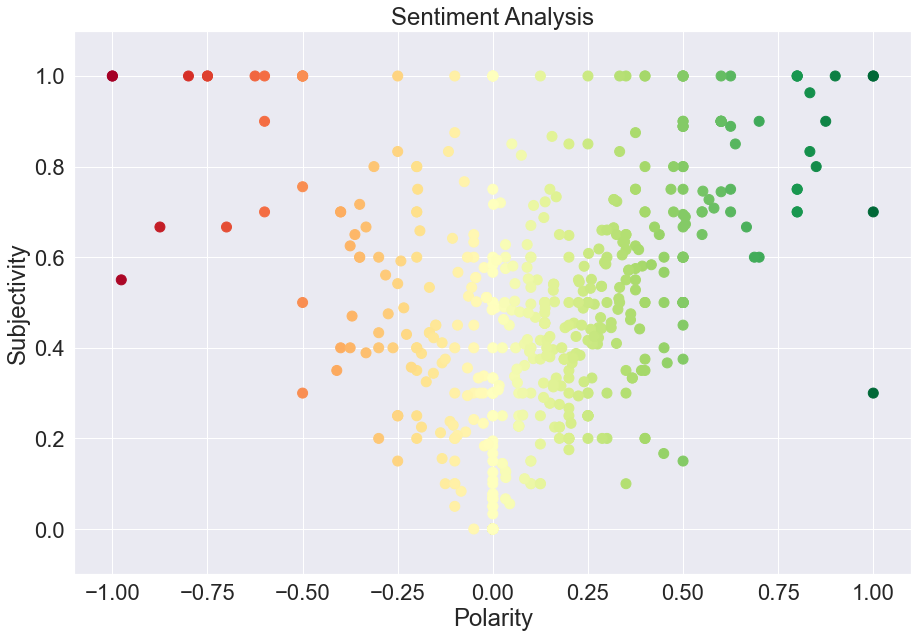

(None,)

In [44]:
plt.figure(figsize=(15,10)) 

# plt.style.use('seaborn-pastel')

plt.scatter(df2['Polarity'], df2['Subjectivity'], c=df2['Polarity'], s=100, cmap='RdYlGn') 

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1) 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show(),

In [45]:
# Show the value counts
df2['Analysis_Polarity'].value_counts()

Neutral     533
Positive    334
Negative    127
Name: Analysis_Polarity, dtype: int64

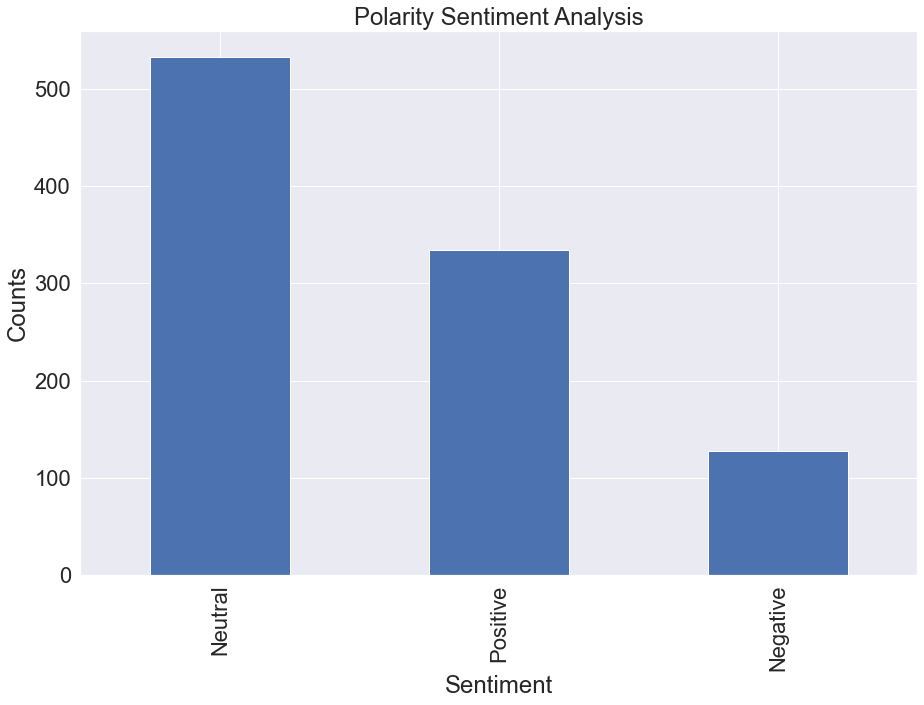

In [46]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Polarity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df2['Analysis_Polarity'].value_counts().plot(kind = 'bar')
plt.show()

In [47]:
# Show the value counts
df2['Analysis_Subjectivity'].value_counts()

Opinion    502
Fact       492
Name: Analysis_Subjectivity, dtype: int64

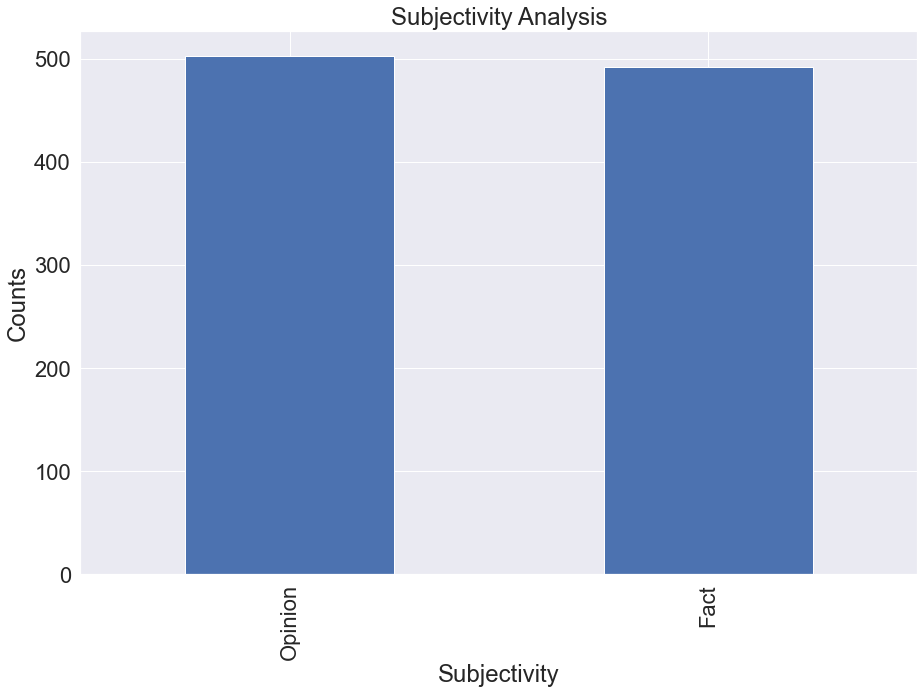

In [48]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Subjectivity Analysis')
plt.xlabel('Subjectivity')
plt.ylabel('Counts')
df2['Analysis_Subjectivity'].value_counts().plot(kind = 'bar')
plt.show()

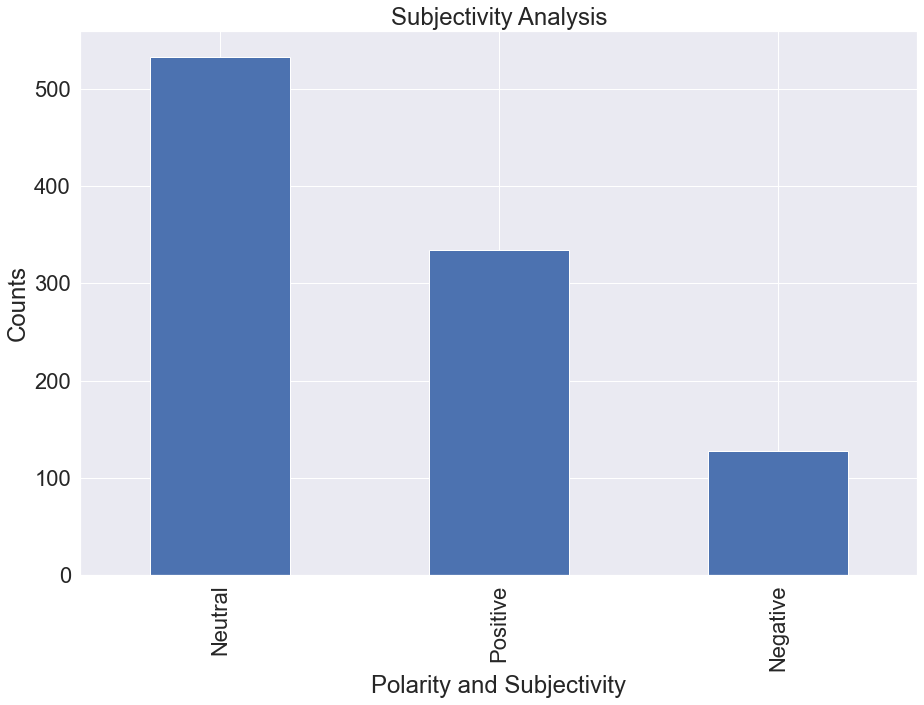

In [49]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Subjectivity Analysis')
plt.xlabel('Polarity and Subjectivity')
plt.ylabel('Counts')
df2['Analysis_Polarity'].value_counts().plot(kind = 'bar')
plt.show()

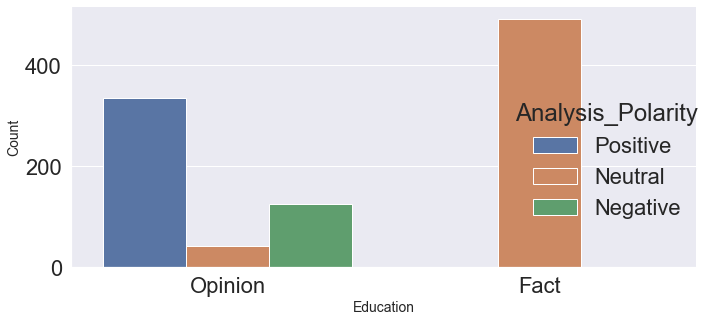

In [50]:
 sns.catplot( x='Analysis_Subjectivity',
             kind="count", 
             hue="Analysis_Polarity", 
             height=5, 
             aspect=1.5, 
             data=df2)
plt.xlabel("Education", size=14)
plt.ylabel("Count", size=14)
plt.tight_layout()
plt.savefig("Grouped_barplot_with_Seaborn_catplot.png")

In [51]:
import pyLDAvis
import gensim
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

C:\Users\Amber\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning:

`scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.

C:\Users\Amber\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning:

The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.



In [52]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(df2['cleaned_text'].values.astype('U'))
print(dtm_tf.shape)

(994, 86)


C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             994 non-null    int64  
 1   Unnamed: 0.1           994 non-null    int64  
 2   id                     994 non-null    int64  
 3   created_at             994 non-null    float64
 4   date                   994 non-null    object 
 5   tweet                  994 non-null    object 
 6   language               994 non-null    object 
 7   hashtags               994 non-null    object 
 8   cashtags               994 non-null    object 
 9   user_id                994 non-null    int64  
 10  urls                   994 non-null    object 
 11  retweet                994 non-null    bool   
 12  cleaned_text           994 non-null    object 
 13  Subjectivity           994 non-null    float64
 14  Polarity               994 non-null    float64
 15  Analys

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [54]:
df2.head()

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Unnamed: 0,Unnamed: 0.1,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,0,0,1247648656364384266,1.586298e+12,2020-04-07 18:13:14,@_Albaseet28 @Valhalla_X0 @baddoleesa @Oma_GuGu @ks1malaika @DONJAZZY @Abass_obesere @teejanson Okay now,en,[],[],148369244,[],False,@_albaseet28 _x0 _gugu _obesere okay,0.5,0.5,Positive,Opinion
1,1,1,1247648778754101248,1.586298e+12,2020-04-07 18:13:43,@GOtvNg Please I need a reconnection of my gotv account. I made payment 2000 for gotvmax instead of gotvplus and my account is yet to be activated. My IUC NUMBER 4601688151 Account details used OKORO DORIS N. #2000Please kindly attend to my request thank you,en,['2000please'],[],1198687087442178048,[],False,please i need reconnection gotv account. i made payment 2000 gotvmax instead gotvplus account yet activated. my iuc number 4601688151 account details used okoro doris n. 2000please kindly attend request thank,0.9,0.6,Positive,Opinion
2,2,2,1247648868923310083,1.586298e+12,2020-04-07 18:14:05,@samiltayyar27 Devletimizden allah razı olsun annem ablam hepside hatta kapıya kadar geldi bilip bilmeden konuşmayın devletinize düşmanlık yapmayın keşke herkese verilse oma olmuyor keşke olsa bende 3 haftadır isyerim kapalı 3 çocuğum var kötü günler için birikim yapmıştık halimize şükür,tr,[],[],2875638485,[],False,devletimizden allah razı olsun annem ablam hepside hatta kapıya kadar geldi bilip bilmeden konuşmayın devletinize düşmanlık yapmayın keşke herkese verilse oma olmuyor keşke olsa bende 3 haftadır isyerim kapalı 3 çocuğum var kötü günler için birikim yapmıştık halimize şükür,0.0,0.0,Neutral,Fact
3,3,3,1247649113430208520,1.586298e+12,2020-04-07 18:15:03,Has #COVID19 caused gaps in your students &amp; residents curriculum? OMA has created education and a curriculum for a FREE four-week obesity medicine “supplemental education” that can be completed remotely/online. https://t.co/du523keBIv,en,['covid19'],[],58538300,['https://obesitymedicine.org/student-education/'],False,has covid19 caused gaps students &amp; residents curriculum? oma created education curriculum free four-week obesity medicine “supplemental education” pleted remotely/online.,0.8,0.4,Positive,Opinion
4,4,4,1247649244602826759,1.586298e+12,2020-04-07 18:15:34,"@MrsMarryPoppins Wenn du 18 bist kannst du machen was du willst... ... früher von mir gehasst, heute verwendet von mir selbst... Dabei wollte ich nie werden wie Oma und Opa. Gleichzeitig realisiere ich, das Oma und Opa mit recht nur mein bestes wollten.",de,[],[],1129147551230439425,[],False,"wenn du 18 bist kannst du machen du willst... ... früher von mir gehasst, heute verwendet von mir selbst... dabei wollte ich nie werden wie oma und opa. gleichzeitig realisiere ich, das oma und opa mit recht nur mein bestes wollten.",0.0,0.0,Neutral,Fact


In [55]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(df2['cleaned_text'].values.astype('U'))
print(dtm_tfidf.shape)

(994, 86)


C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\Users\Amber\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1805: UserWarning:

Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.



In [56]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components =5, random_state=50)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components =5, random_state=50)
lda_tfidf.fit(dtm_tfidf)

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



LatentDirichletAllocation(n_components=5, random_state=50)

In [57]:
for i,topic in enumerate(lda_tf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-30:]])
    print('\n')

Top 10 words for topic #0:
['work', 'long', 'people', 'right', 'video', 'make', 'help', 'today', 'really', 'know', 'april', 'year', 'day', 'home', 'away', 'like', 'want', 'went', 'new', 'years', 'online', 'national', 'virtual', 'don', 'time', 'world', 'check', 'museums', 'art', 'museum']


Top 10 words for topic #1:
['better', 'away', 'don', 'got', 'new', 'good', 'make', 'want', 'video', 'online', 'read', 'time', 'great', 'help', 'work', 'really', 'home', 'easter', 'essential', 'bunny', 'right', 'use', 'love', 'stay', 'sure', 'marketing', 'know', 'think', 'need', 'digital']


Top 10 words for topic #2:
['really', 'want', 'help', 'great', 'onpoli', 'toronto', 'canada', 'got', 'work', 'day', 'better', 'god', 'used', 'way', 'using', 'contra', 'masks', 'make', 'today', 'say', 'long', 'good', 'care', 'thank', 'health', 'testing', 'like', 'people', 'covid', 'ontario']


Top 10 words for topic #3:
['long', 'pandemic', 'help', 'want', 'virus', 'god', 'coronavirus', 'people', 'make', 'digital',

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [72]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.126895  0.209712       1        1  24.582914
1      0.261976 -0.091329       2        1  20.226930
0      0.249962 -0.011818       3        1  18.979422
3     -0.262166 -0.290023       4        1  18.352031
4     -0.122877  0.183458       5        1  17.858703, topic_info=        Term        Freq       Total Category  logprob  loglift
19   digital  183.000000  183.000000  Default  30.0000  30.0000
42    museum  168.000000  168.000000  Default  29.0000  29.0000
51   ontario  194.000000  194.000000  Default  28.0000  28.0000
57       que   88.000000   88.000000  Default  27.0000  27.0000
48       oma   74.000000   74.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
81      went    1.485549   10.553325   Topic5  -5.6693  -0.2380
44  national    1.455815   12.444604   Topic5  -5.6896  -0.4230
30      home    1.501513   19.223539   Topic5  -5.6586  -0.8270
33      like    1.954766   35.320418   Topic5  -5.3948  -1.1715
28    health    0.911375   22.123073   Topic5  -6.1579  -1.4667

[196 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         5  0.982251    amp
1         3  0.413152  april
1         5  0.590217  april
2         3  0.974109    art
3         2  0.262370   away
...     ...       ...    ...
84        3  0.595605   year
84        5  0.340346   year
85        1  0.211675  years
85        2  0.141117  years
85        3  0.635026  years

[141 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 4, 5])

In [73]:
topic_values = lda_tf.transform(dtm_tf)
topic_values.shape

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(994, 5)

In [74]:
df2.head()

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Unnamed: 0,Unnamed: 0.1,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,Topic
0,0,0,1247648656364384266,1.586298e+12,2020-04-07 18:13:14,@_Albaseet28 @Valhalla_X0 @baddoleesa @Oma_GuGu @ks1malaika @DONJAZZY @Abass_obesere @teejanson Okay now,en,[],[],148369244,[],False,@_albaseet28 _x0 _gugu _obesere okay,0.5,0.5,Positive,Opinion,Facemask
1,1,1,1247648778754101248,1.586298e+12,2020-04-07 18:13:43,@GOtvNg Please I need a reconnection of my gotv account. I made payment 2000 for gotvmax instead of gotvplus and my account is yet to be activated. My IUC NUMBER 4601688151 Account details used OKORO DORIS N. #2000Please kindly attend to my request thank you,en,['2000please'],[],1198687087442178048,[],False,please i need reconnection gotv account. i made payment 2000 gotvmax instead gotvplus account yet activated. my iuc number 4601688151 account details used okoro doris n. 2000please kindly attend request thank,0.9,0.6,Positive,Opinion,Kindness
2,2,2,1247648868923310083,1.586298e+12,2020-04-07 18:14:05,@samiltayyar27 Devletimizden allah razı olsun annem ablam hepside hatta kapıya kadar geldi bilip bilmeden konuşmayın devletinize düşmanlık yapmayın keşke herkese verilse oma olmuyor keşke olsa bende 3 haftadır isyerim kapalı 3 çocuğum var kötü günler için birikim yapmıştık halimize şükür,tr,[],[],2875638485,[],False,devletimizden allah razı olsun annem ablam hepside hatta kapıya kadar geldi bilip bilmeden konuşmayın devletinize düşmanlık yapmayın keşke herkese verilse oma olmuyor keşke olsa bende 3 haftadır isyerim kapalı 3 çocuğum var kötü günler için birikim yapmıştık halimize şükür,0.0,0.0,Neutral,Fact,People
3,3,3,1247649113430208520,1.586298e+12,2020-04-07 18:15:03,Has #COVID19 caused gaps in your students &amp; residents curriculum? OMA has created education and a curriculum for a FREE four-week obesity medicine “supplemental education” that can be completed remotely/online. https://t.co/du523keBIv,en,['covid19'],[],58538300,['https://obesitymedicine.org/student-education/'],False,has covid19 caused gaps students &amp; residents curriculum? oma created education curriculum free four-week obesity medicine “supplemental education” pleted remotely/online.,0.8,0.4,Positive,Opinion,Free
4,4,4,1247649244602826759,1.586298e+12,2020-04-07 18:15:34,"@MrsMarryPoppins Wenn du 18 bist kannst du machen was du willst... ... früher von mir gehasst, heute verwendet von mir selbst... Dabei wollte ich nie werden wie Oma und Opa. Gleichzeitig realisiere ich, das Oma und Opa mit recht nur mein bestes wollten.",de,[],[],1129147551230439425,[],False,"wenn du 18 bist kannst du machen du willst... ... früher von mir gehasst, heute verwendet von mir selbst... dabei wollte ich nie werden wie oma und opa. gleichzeitig realisiere ich, das oma und opa mit recht nur mein bestes wollten.",0.0,0.0,Neutral,Fact,People


In [75]:
df2['Topic'] = topic_values.argmax(axis=1)

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             994 non-null    int64  
 1   Unnamed: 0.1           994 non-null    int64  
 2   id                     994 non-null    int64  
 3   created_at             994 non-null    float64
 4   date                   994 non-null    object 
 5   tweet                  994 non-null    object 
 6   language               994 non-null    object 
 7   hashtags               994 non-null    object 
 8   cashtags               994 non-null    object 
 9   user_id                994 non-null    int64  
 10  urls                   994 non-null    object 
 11  retweet                994 non-null    bool   
 12  cleaned_text           994 non-null    object 
 13  Subjectivity           994 non-null    float64
 14  Polarity               994 non-null    float64
 15  Analys

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [77]:
df4=df2
df4.head()
df4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             994 non-null    int64  
 1   Unnamed: 0.1           994 non-null    int64  
 2   id                     994 non-null    int64  
 3   created_at             994 non-null    float64
 4   date                   994 non-null    object 
 5   tweet                  994 non-null    object 
 6   language               994 non-null    object 
 7   hashtags               994 non-null    object 
 8   cashtags               994 non-null    object 
 9   user_id                994 non-null    int64  
 10  urls                   994 non-null    object 
 11  retweet                994 non-null    bool   
 12  cleaned_text           994 non-null    object 
 13  Subjectivity           994 non-null    float64
 14  Polarity               994 non-null    float64
 15  Analys

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [78]:
df4['Topic']=df4['Topic'].replace({0:'ontario',1:'digital',2:'museum',3:'que',4:'covid'})

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [79]:
df4.head()
df4.info()
df4['Topic'].head(20)
#df4.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             994 non-null    int64  
 1   Unnamed: 0.1           994 non-null    int64  
 2   id                     994 non-null    int64  
 3   created_at             994 non-null    float64
 4   date                   994 non-null    object 
 5   tweet                  994 non-null    object 
 6   language               994 non-null    object 
 7   hashtags               994 non-null    object 
 8   cashtags               994 non-null    object 
 9   user_id                994 non-null    int64  
 10  urls                   994 non-null    object 
 11  retweet                994 non-null    bool   
 12  cleaned_text           994 non-null    object 
 13  Subjectivity           994 non-null    float64
 14  Polarity               994 non-null    float64
 15  Analys

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0     ontario
1      museum
2         que
3       covid
4         que
5     digital
6     ontario
7     ontario
8         que
9         que
10    ontario
11        que
12    ontario
13    ontario
14        que
15    digital
16        que
17    ontario
18    ontario
19        que
Name: Topic, dtype: object

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<Figure size 2880x1800 with 0 Axes>

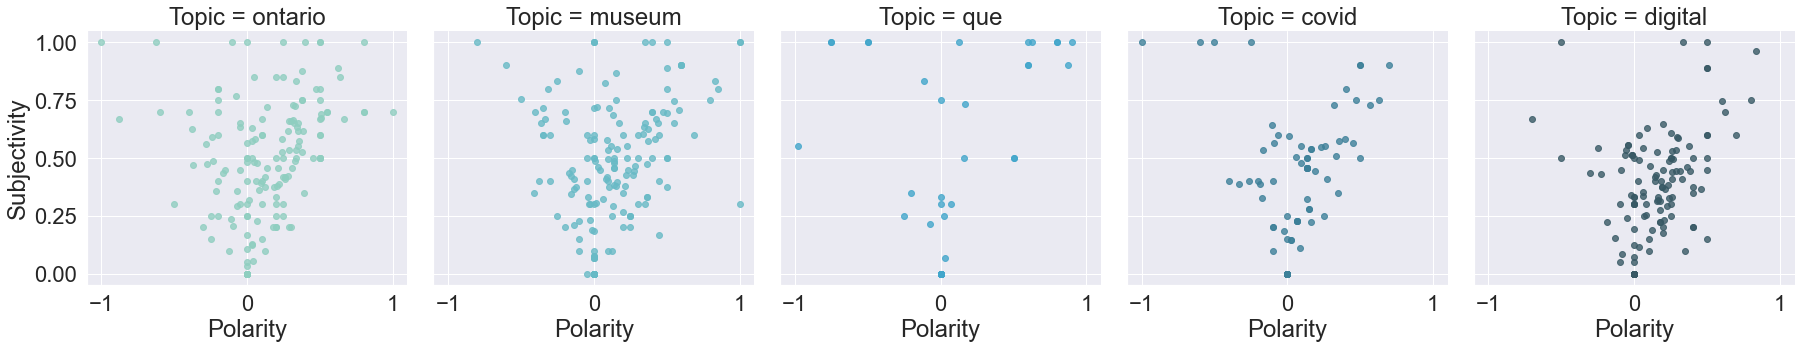

In [80]:
import seaborn as sns


plt.figure(figsize=(40,25)) 

g=sns.lmplot(x="Polarity", y="Subjectivity", hue='Topic', data=df4, fit_reg=False, legend=False,palette="GnBu_d", col='Topic', legend_out=True)
 
# # Move the legend to an empty part of the plot
# plt.legend(loc='lower right')
 
plt.show()

In [83]:
#create output file for SAS
df4.head()

df4.to_csv("PolaritySubjectivity_topic_april10.csv")


C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [84]:
#df4.to_csv("PolaritySubjectivity_topic_mar16.csv")

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [85]:
df4_1 = df4.groupby(['Topic'])['Analysis_Polarity'].value_counts().unstack('Topic').transpose()

df4_1

#df2['Total'] = df2.sum(axis=1)

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Analysis_Polarity,Negative,Neutral,Positive
Topic,,,
covid,19,35,43
digital,21,82,79
museum,41,106,96
ontario,37,188,100
que,9,122,16


In [86]:
df4_1['Total'] = df4_1.sum(axis=1)

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [87]:
df4_1.columns

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['Negative', 'Neutral', 'Positive', 'Total'], dtype='object', name='Analysis_Polarity')

In [88]:
for i in df4_1:
    df4_1[i] = round(df4_1[i]*100/df4_1.Total)

df4_1

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Analysis_Polarity,Negative,Neutral,Positive,Total
Topic,,,,
covid,20.0,36.0,44.0,100.0
digital,12.0,45.0,43.0,100.0
museum,17.0,44.0,40.0,100.0
ontario,11.0,58.0,31.0,100.0
que,6.0,83.0,11.0,100.0


In [89]:
df4=df4.fillna(0)

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [90]:
df4.head()
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             994 non-null    int64  
 1   Unnamed: 0.1           994 non-null    int64  
 2   id                     994 non-null    int64  
 3   created_at             994 non-null    float64
 4   date                   994 non-null    object 
 5   tweet                  994 non-null    object 
 6   language               994 non-null    object 
 7   hashtags               994 non-null    object 
 8   cashtags               994 non-null    object 
 9   user_id                994 non-null    int64  
 10  urls                   994 non-null    object 
 11  retweet                994 non-null    bool   
 12  cleaned_text           994 non-null    object 
 13  Subjectivity           994 non-null    float64
 14  Polarity               994 non-null    float64
 15  Analys

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [91]:
#df4= df4.drop(['Total'], axis=1)

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [92]:
df4.head()

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Unnamed: 0,Unnamed: 0.1,id,created_at,date,tweet,language,hashtags,cashtags,user_id,urls,retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,Topic
0,0,0,1247648656364384266,1.586298e+12,2020-04-07 18:13:14,@_Albaseet28 @Valhalla_X0 @baddoleesa @Oma_GuGu @ks1malaika @DONJAZZY @Abass_obesere @teejanson Okay now,en,[],[],148369244,[],False,@_albaseet28 _x0 _gugu _obesere okay,0.5,0.5,Positive,Opinion,ontario
1,1,1,1247648778754101248,1.586298e+12,2020-04-07 18:13:43,@GOtvNg Please I need a reconnection of my gotv account. I made payment 2000 for gotvmax instead of gotvplus and my account is yet to be activated. My IUC NUMBER 4601688151 Account details used OKORO DORIS N. #2000Please kindly attend to my request thank you,en,['2000please'],[],1198687087442178048,[],False,please i need reconnection gotv account. i made payment 2000 gotvmax instead gotvplus account yet activated. my iuc number 4601688151 account details used okoro doris n. 2000please kindly attend request thank,0.9,0.6,Positive,Opinion,museum
2,2,2,1247648868923310083,1.586298e+12,2020-04-07 18:14:05,@samiltayyar27 Devletimizden allah razı olsun annem ablam hepside hatta kapıya kadar geldi bilip bilmeden konuşmayın devletinize düşmanlık yapmayın keşke herkese verilse oma olmuyor keşke olsa bende 3 haftadır isyerim kapalı 3 çocuğum var kötü günler için birikim yapmıştık halimize şükür,tr,[],[],2875638485,[],False,devletimizden allah razı olsun annem ablam hepside hatta kapıya kadar geldi bilip bilmeden konuşmayın devletinize düşmanlık yapmayın keşke herkese verilse oma olmuyor keşke olsa bende 3 haftadır isyerim kapalı 3 çocuğum var kötü günler için birikim yapmıştık halimize şükür,0.0,0.0,Neutral,Fact,que
3,3,3,1247649113430208520,1.586298e+12,2020-04-07 18:15:03,Has #COVID19 caused gaps in your students &amp; residents curriculum? OMA has created education and a curriculum for a FREE four-week obesity medicine “supplemental education” that can be completed remotely/online. https://t.co/du523keBIv,en,['covid19'],[],58538300,['https://obesitymedicine.org/student-education/'],False,has covid19 caused gaps students &amp; residents curriculum? oma created education curriculum free four-week obesity medicine “supplemental education” pleted remotely/online.,0.8,0.4,Positive,Opinion,covid
4,4,4,1247649244602826759,1.586298e+12,2020-04-07 18:15:34,"@MrsMarryPoppins Wenn du 18 bist kannst du machen was du willst... ... früher von mir gehasst, heute verwendet von mir selbst... Dabei wollte ich nie werden wie Oma und Opa. Gleichzeitig realisiere ich, das Oma und Opa mit recht nur mein bestes wollten.",de,[],[],1129147551230439425,[],False,"wenn du 18 bist kannst du machen du willst... ... früher von mir gehasst, heute verwendet von mir selbst... dabei wollte ich nie werden wie oma und opa. gleichzeitig realisiere ich, das oma und opa mit recht nur mein bestes wollten.",0.0,0.0,Neutral,Fact,que


In [93]:
df4_1

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Analysis_Polarity,Negative,Neutral,Positive,Total
Topic,,,,
covid,20.0,36.0,44.0,100.0
digital,12.0,45.0,43.0,100.0
museum,17.0,44.0,40.0,100.0
ontario,11.0,58.0,31.0,100.0
que,6.0,83.0,11.0,100.0


C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



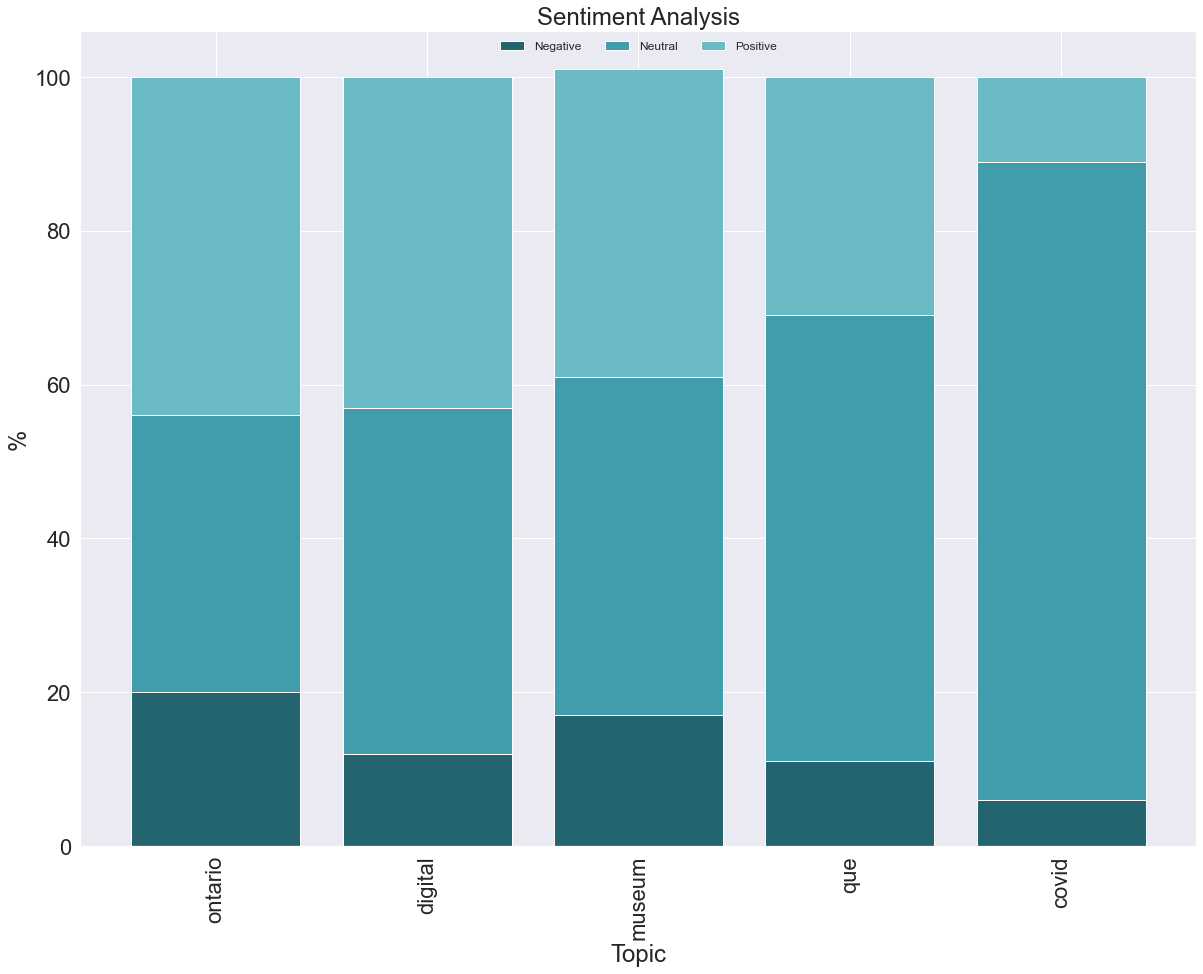

In [95]:
plt.figure(figsize=(20,15)) 


topic = ['ontario','digital','museum','que','covid']
sentiment = ['Negative', 'Neutral', 'Positive']
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('%')
p1=plt.bar(topic,df4_1['Negative'], color='#23646e')
p2=plt.bar(topic,df4_1['Neutral'], color='#419dab', bottom=df4_1['Negative'])
p3=plt.bar(topic,df4_1['Positive'], color='#6bbbc7', bottom=df4_1['Neutral']+df4_1['Negative'])
plt.xticks(topic, rotation=90)
plt.xlabel("Topic")
plt.legend((p1[0], p2[0], p3[0]),('Negative', 'Neutral', 'Positive'),fontsize=12, ncol=4, framealpha=0, fancybox=True, loc='upper center')

plt.show()


In [96]:
df4['Topic'].value_counts()

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



ontario    325
museum     243
digital    182
que        147
covid       97
Name: Topic, dtype: int64

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<AxesSubplot:xlabel='Topic', ylabel='count'>

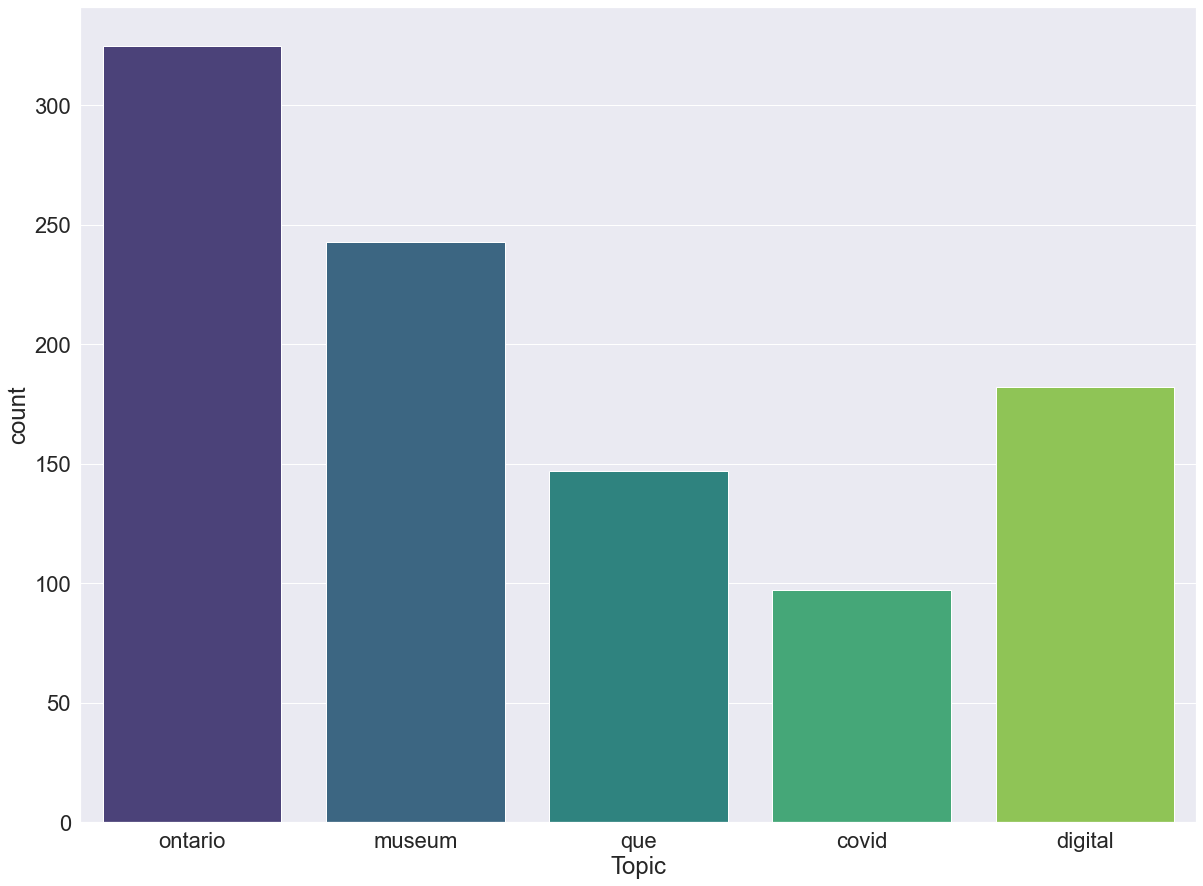

In [97]:
plt.figure(figsize=(20,15)) 
sns.countplot(x = 'Topic',data = df4, palette = 'viridis')


In [98]:
#df4.head()
rng = pd.date_range(start='01/09/2020', end ='30/11/2020',freq='D')


C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [99]:
df5_1 = df4.groupby(['date','Topic'])['cleaned_text'].count().reset_index()

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [100]:
df5_1

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,date,Topic,cleaned_text
0,2020-04-07 18:13:14,ontario,1
1,2020-04-07 18:13:43,museum,1
2,2020-04-07 18:14:05,que,1
3,2020-04-07 18:15:03,covid,1
4,2020-04-07 18:15:34,que,1
...,...,...,...
820,2020-04-07 19:59:58,que,1
821,2020-04-07 19:59:59,covid,5
822,2020-04-07 19:59:59,digital,2
823,2020-04-07 19:59:59,museum,2


In [101]:
pivoted = df5_1.pivot( index='date',columns='Topic', values='cleaned_text').reset_index()

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [102]:
pivoted=pivoted.fillna(0)

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [104]:
pivoted.to_csv("tweets1_by_date_april10.csv")

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



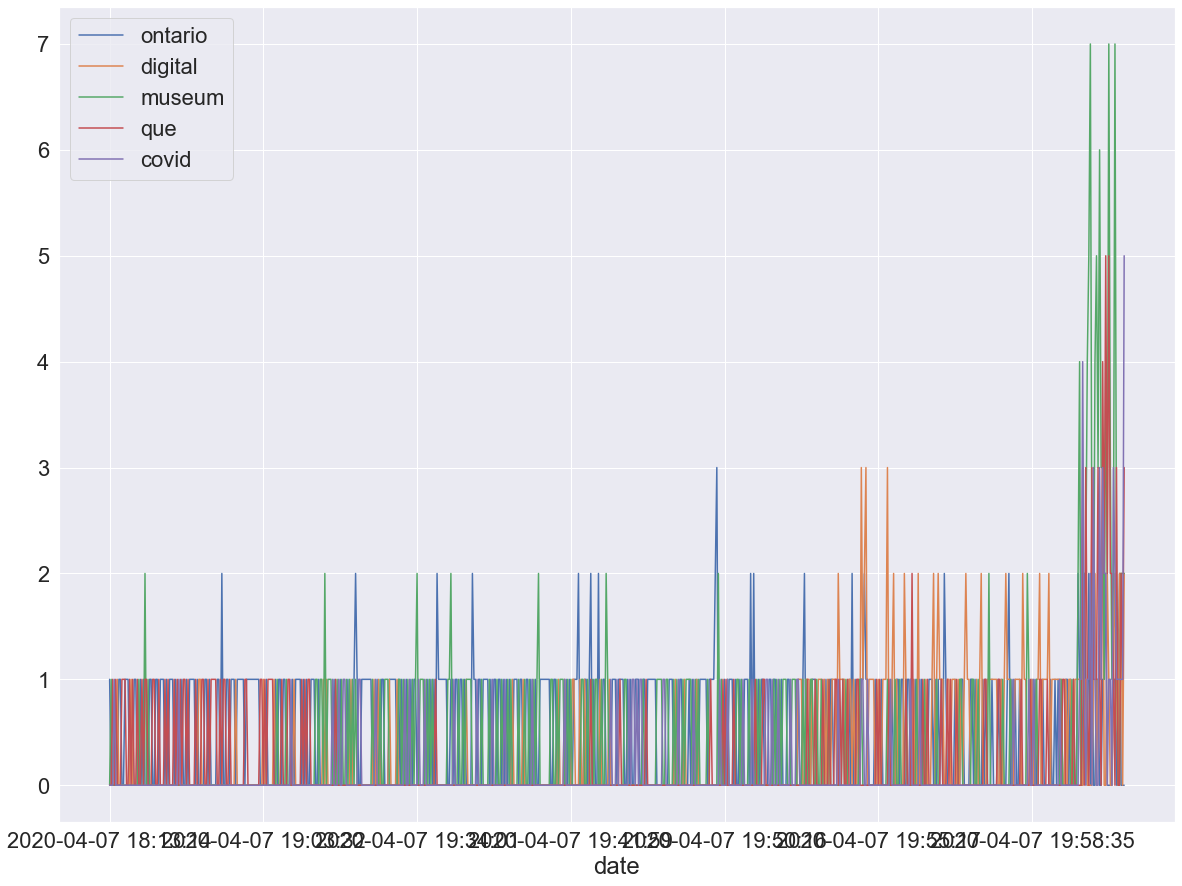

In [105]:
import matplotlib.dates as mdates

plt.figure(figsize=(20,15)) 

# gca stands for 'get current axis'
ax = plt.gca()

pivoted.plot(kind='line', x='date', y='ontario', label='ontario',ax=ax)
pivoted.plot(kind='line', x='date', y='digital', label='digital',ax=ax)
pivoted.plot(kind='line', x='date', y='museum', label='museum',ax=ax)
pivoted.plot(kind='line', x='date', y='que', label='que',ax=ax)
pivoted.plot(kind='line', x='date', y='covid', label='covid',ax=ax)


# ax.xaxis_date()
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

plt.legend()
plt.show()



In [106]:
# # Preparing a corpus for analysis and checking first 10 entries
corpus=[]
a=[]
for i in range(len(df4['cleaned_text'])):
    a=df4['cleaned_text'][i]
    corpus.append(a)
        
print(corpus[0:10])

['@_albaseet28 _x0 _gugu _obesere okay', 'please i need reconnection gotv account. i made payment 2000 gotvmax instead gotvplus account yet activated. my iuc number 4601688151 account details used okoro doris n. 2000please kindly attend request thank', 'devletimizden allah razı olsun annem ablam hepside hatta kapıya kadar geldi bilip bilmeden konuşmayın devletinize düşmanlık yapmayın keşke herkese verilse oma olmuyor keşke olsa bende 3 haftadır isyerim kapalı 3 çocuğum var kötü günler için birikim yapmıştık halimize şükür', 'has covid19 caused gaps students &amp; residents curriculum? oma created education curriculum free four-week obesity medicine “supplemental education” pleted remotely/online.', 'wenn du 18 bist kannst du machen du willst... ... früher von mir gehasst, heute verwendet von mir selbst... dabei wollte ich nie werden wie oma und opa. gleichzeitig realisiere ich, das oma und opa mit recht nur mein bestes wollten.', '_gugu great thy faithfulness', '_kutuh mad oooo dat yea

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [107]:
import os
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict
import seaborn as sns
import gensim
import matplotlib.pyplot as plt
%matplotlib inline

# init_notebook_mode(connected=True) #do not miss this line

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [108]:
list1 = ['RT','rt']
stoplist = stopwords.words('english') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

dictionary = corpora.Dictionary(texts)

# print(dictionary)
# print(dictionary.token2id)

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [109]:
corpus = [dictionary.doc2bow(text) for text in texts]

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [110]:
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [111]:
corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [112]:
total_topics = 5

lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

#Show first n important word in the topics:
lda.show_topics(total_topics,5)

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[(0,
  '0.013*"ontario" + 0.008*"de" + 0.007*"museum" + 0.006*"digital" + 0.005*"que"'),
 (1,
  '0.013*"de" + 0.010*"digital" + 0.006*"la" + 0.005*"covid" + 0.005*"que"'),
 (2,
  '0.013*"de" + 0.010*"digital" + 0.008*"museum" + 0.008*"ontario" + 0.006*"covid-19"'),
 (3,
  '0.005*"ontario" + 0.004*"de" + 0.004*"oma" + 0.003*"el" + 0.003*"museum"'),
 (4,
  '0.006*"museum" + 0.005*"digital" + 0.004*"covid-19" + 0.003*"covid" + 0.003*"la"')]

In [113]:
total_topics = 8

lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

#Show first n important word in the topics:
lda.show_topics(total_topics,8)

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[(0,
  '0.010*"museum" + 0.007*"ontario" + 0.005*"oma" + 0.004*"la" + 0.004*"digital" + 0.004*"de" + 0.003*"el" + 0.003*"covid_19"'),
 (1,
  '0.012*"ontario" + 0.006*"de" + 0.004*"covid" + 0.004*"museum" + 0.003*"oma" + 0.003*"covid-19" + 0.003*"que" + 0.003*"like"'),
 (2,
  '0.011*"covid-19" + 0.011*"museum" + 0.010*"de" + 0.007*"que" + 0.006*"el" + 0.005*"covid" + 0.004*"en" + 0.004*"ontario"'),
 (3,
  '0.016*"de" + 0.011*"la" + 0.007*"que" + 0.006*"ontario" + 0.005*"digital" + 0.005*"covid" + 0.005*"museum" + 0.005*"&amp;"'),
 (4,
  '0.013*"digital" + 0.006*"ontario" + 0.005*"&amp;" + 0.005*"de" + 0.005*"museum" + 0.004*"covid-19" + 0.003*"need" + 0.003*"health"'),
 (5,
  '0.015*"de" + 0.012*"digital" + 0.007*"que" + 0.006*"la" + 0.005*"el" + 0.005*"museum" + 0.004*"en" + 0.004*"people"'),
 (6,
  '0.009*"ontario" + 0.006*"digital" + 0.004*"covid" + 0.004*"museum" + 0.003*"oma" + 0.003*"covid-19" + 0.003*"people" + 0.003*"good"'),
 (7,
  '0.009*"digital" + 0.008*"de" + 0.007*"museum"

In [114]:
data_lda = {i: OrderedDict(lda.show_topic(i,5)) for i in range(total_topics)}
data_lda

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{0: OrderedDict([('museum', 0.01009232),
              ('ontario', 0.006916849),
              ('oma', 0.005438255),
              ('la', 0.0043578395),
              ('digital', 0.0041077146)]),
 1: OrderedDict([('ontario', 0.011784936),
              ('de', 0.0064647933),
              ('covid', 0.0039243726),
              ('museum', 0.0035964218),
              ('oma', 0.0031006953)]),
 2: OrderedDict([('covid-19', 0.010614583),
              ('museum', 0.010603184),
              ('de', 0.009652624),
              ('que', 0.0069653164),
              ('el', 0.005574878)]),
 3: OrderedDict([('de', 0.016414072),
              ('la', 0.010586793),
              ('que', 0.007446099),
              ('ontario', 0.006337295),
              ('digital', 0.0054438096)]),
 4: OrderedDict([('digital', 0.01280849),
              ('ontario', 0.0062045027),
              ('&amp;', 0.0052268547),
              ('de', 0.005082175),
              ('museum', 0.0048223347)]),
 5: OrderedDict([('de', 

In [115]:
df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(8, 11)


C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [116]:
df_lda

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,museum,ontario,oma,la,digital,de,covid,covid-19,que,el,&amp;
0,0.010092,0.006917,0.005438,0.004358,0.004108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.003596,0.011785,0.003101,0.000000,0.000000,0.006465,0.003924,0.000000,0.000000,0.000000,0.000000
2,0.010603,0.000000,0.000000,0.000000,0.000000,0.009653,0.000000,0.010615,0.006965,0.005575,0.000000
3,0.000000,0.006337,0.000000,0.010587,0.005444,0.016414,0.000000,0.000000,0.007446,0.000000,0.000000
4,0.004822,0.006205,0.000000,0.000000,0.012808,0.005082,0.000000,0.000000,0.000000,0.000000,0.005227
5,0.000000,0.000000,0.000000,0.005832,0.011830,0.015286,0.000000,0.000000,0.007149,0.005187,0.000000
6,0.003760,0.008716,0.003179,0.000000,0.005860,0.000000,0.003763,0.000000,0.000000,0.000000,0.000000
7,0.007158,0.003962,0.003889,0.000000,0.008721,0.007694,0.000000,0.000000,0.000000,0.000000,0.000000


In [117]:
try_lda=df_lda.T

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [118]:
try_lda

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,0,1,2,3,4,5,6,7
museum,0.010092,0.003596,0.010603,0.000000,0.004822,0.000000,0.003760,0.007158
ontario,0.006917,0.011785,0.000000,0.006337,0.006205,0.000000,0.008716,0.003962
oma,0.005438,0.003101,0.000000,0.000000,0.000000,0.000000,0.003179,0.003889
la,0.004358,0.000000,0.000000,0.010587,0.000000,0.005832,0.000000,0.000000
digital,0.004108,0.000000,0.000000,0.005444,0.012808,0.011830,0.005860,0.008721
de,0.000000,0.006465,0.009653,0.016414,0.005082,0.015286,0.000000,0.007694
covid,0.000000,0.003924,0.000000,0.000000,0.000000,0.000000,0.003763,0.000000
covid-19,0.000000,0.000000,0.010615,0.000000,0.000000,0.000000,0.000000,0.000000
que,0.000000,0.000000,0.006965,0.007446,0.000000,0.007149,0.000000,0.000000
el,0.000000,0.000000,0.005575,0.000000,0.000000,0.005187,0.000000,0.000000


C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



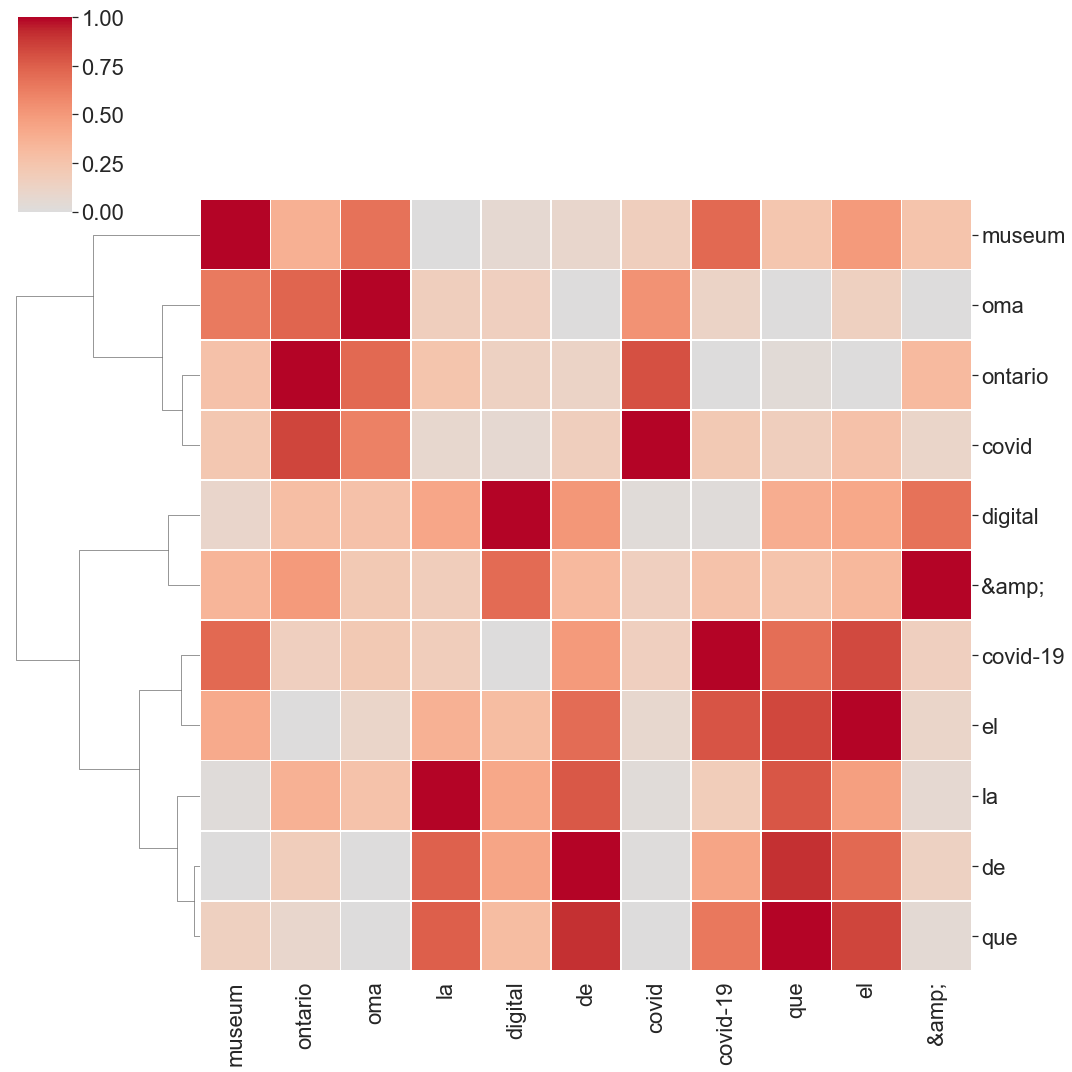

In [119]:
g=sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="coolwarm", metric='cosine', linewidths=.75, figsize=(15, 15), col_cluster=False)
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

plt.show()
#plt.setp(ax_heatmap.get_yticklabels(), rotation=0)  # For y axis

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

C:\Users\Amber\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [122]:
dataset = pd.read_csv('tweets1_by_date_mar18.csv')


In [123]:
# Statistical summary
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,661.0,330.000000,190.958547,0.0,165.0,330.0,495.0,660.0
covid,661.0,0.146747,0.471563,0.0,0.0,0.0,0.0,5.0
digital,661.0,0.275340,0.542005,0.0,0.0,0.0,0.0,3.0
museum,661.0,0.367625,0.836359,0.0,0.0,0.0,1.0,7.0
ontario,661.0,0.491679,0.568363,0.0,0.0,0.0,1.0,3.0
que,661.0,0.222390,0.569833,0.0,0.0,0.0,0.0,5.0


In [124]:
# Identify continuous variables
print(dataset.select_dtypes(['float']).columns)

Index(['covid', 'digital', 'museum', 'ontario', 'que'], dtype='object')


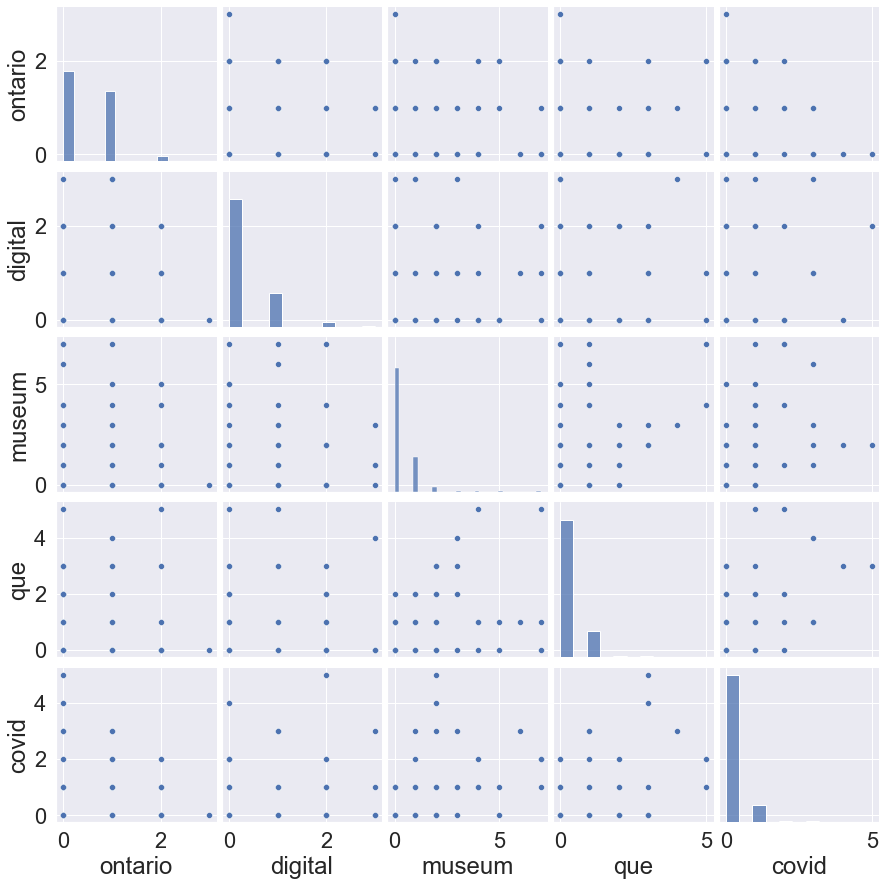

In [126]:

##Next, I want to compare the relationship (Correlation) between the identified topics in the dataset.

sns.pairplot(dataset[['ontario','digital','museum','que','covid']])

plt.show()

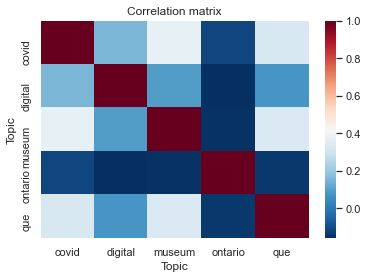

In [127]:
#This is another visual representation of Correlation Matrix to use
## SELECT COLORS https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/


corrMatrix = pivoted.corr()

sns.set(font_scale=1)
sns.heatmap(corrMatrix, annot=False,
            xticklabels=corrMatrix.columns,
            yticklabels=corrMatrix.columns,
            cmap='RdBu_r'
            )
plt.title('Correlation matrix')
plt.show()

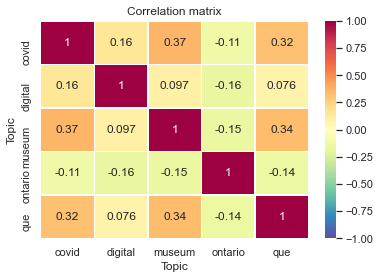

In [128]:
#This is another visual representation of Correlation Matrix to use
sns.set(font_scale=1)
sns.heatmap(corrMatrix, annot=True, linewidth = 0.5, cmap='Spectral_r',square=False, vmin = -1, vmax = 1)
plt.title('Correlation matrix')

plt.show()

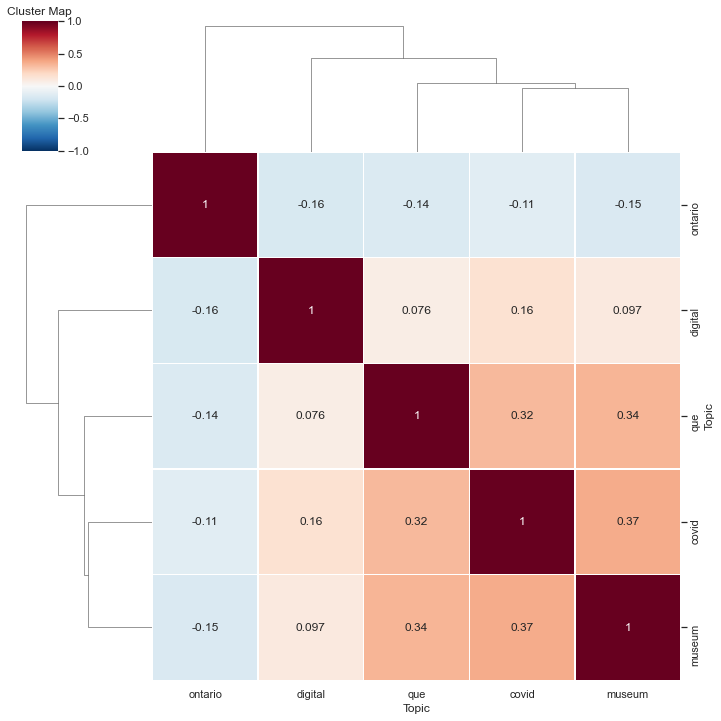

In [129]:
# Create cluter map
sns.clustermap(corrMatrix, annot=True, linewidth = 0.5, cmap='RdBu_r',square=False, vmin = -1, vmax = 1)
plt.title('Cluster Map')

plt.show()